In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [11]:
df_na=pd.read_csv("../data/df_na.csv")

In [3]:
X_cluster_l=pd.read_csv("../data/X_cluster_l.csv")
X_cluster_r=pd.read_csv("../data/X_cluster_r.csv")
X_cluster_s=pd.read_csv("../data/X_cluster_s.csv")

In [4]:
X_spec=pd.read_csv("../data/X_spec.csv")
X_log=pd.read_csv("../data/X_log.csv")
X_route=pd.read_csv("../data/X_route.csv")
X_corred = pd.read_csv("../data/X_corred.csv")

# 클러스터링 정리

In [8]:
len(X_corred), len(X_cluster_l), len(X_cluster_r), len(X_cluster_s)

(159963, 159963, 159963, 159963)

In [12]:
clusterer = KMeans(n_clusters=3, max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(X_cluster_l)
X_cluster_l['cluster_label_l']=cluster_labels

clusterer = KMeans(n_clusters=2, max_iter=500, random_state=0)
cluster_labels2 = clusterer.fit_predict(X_cluster_r)
X_cluster_r['cluster_label_r']=cluster_labels2

clusterer = KMeans(n_clusters=3, max_iter=500, random_state=0)
cluster_labels3 = clusterer.fit_predict(X_cluster_s)
X_cluster_s['cluster_label_s']=cluster_labels3


In [13]:
X_cluster_l['유저_번호']=df_na['유저_번호']
X_cluster_r['유저_번호']=df_na['유저_번호']
X_cluster_s['유저_번호']=df_na['유저_번호']

In [14]:
cluster_df = pd.concat([df_na['유저_번호'], X_cluster_l['cluster_label_l'], 
                        X_cluster_r['cluster_label_r'], X_cluster_s['cluster_label_s']], axis=1)
cluster_df.to_csv("../data/cluster_df.csv", index=False)
cluster_df


,유저_번호,cluster_label_l,cluster_label_r,cluster_label_s
0,11.0,0,0,0
1,12.0,0,0,0
2,17.0,0,0,0
3,24.0,0,0,0
4,25.0,0,0,0
...,...,...,...,...
159958,879683.0,1,1,1
159959,879689.0,1,1,1
159960,879691.0,1,1,1
159961,879692.0,1,1,1


In [15]:
cluster000=cluster_df[(cluster_df['cluster_label_l']==0)&(cluster_df['cluster_label_r']==0)&(cluster_df['cluster_label_s']==0)]
cluster001=cluster_df[(cluster_df['cluster_label_l']==0)&(cluster_df['cluster_label_r']==0)&(cluster_df['cluster_label_s']==1)]
cluster002=cluster_df[(cluster_df['cluster_label_l']==0)&(cluster_df['cluster_label_r']==0)&(cluster_df['cluster_label_s']==2)]
cluster010=cluster_df[(cluster_df['cluster_label_l']==0)&(cluster_df['cluster_label_r']==1)&(cluster_df['cluster_label_s']==0)]
cluster011=cluster_df[(cluster_df['cluster_label_l']==0)&(cluster_df['cluster_label_r']==1)&(cluster_df['cluster_label_s']==1)]
cluster012=cluster_df[(cluster_df['cluster_label_l']==0)&(cluster_df['cluster_label_r']==1)&(cluster_df['cluster_label_s']==2)]
cluster100=cluster_df[(cluster_df['cluster_label_l']==1)&(cluster_df['cluster_label_r']==0)&(cluster_df['cluster_label_s']==0)]
cluster101=cluster_df[(cluster_df['cluster_label_l']==1)&(cluster_df['cluster_label_r']==0)&(cluster_df['cluster_label_s']==1)]
cluster102=cluster_df[(cluster_df['cluster_label_l']==1)&(cluster_df['cluster_label_r']==0)&(cluster_df['cluster_label_s']==2)]
cluster110=cluster_df[(cluster_df['cluster_label_l']==1)&(cluster_df['cluster_label_r']==1)&(cluster_df['cluster_label_s']==0)]
cluster111=cluster_df[(cluster_df['cluster_label_l']==1)&(cluster_df['cluster_label_r']==1)&(cluster_df['cluster_label_s']==1)]
cluster112=cluster_df[(cluster_df['cluster_label_l']==1)&(cluster_df['cluster_label_r']==1)&(cluster_df['cluster_label_s']==2)]
cluster200=cluster_df[(cluster_df['cluster_label_l']==2)&(cluster_df['cluster_label_r']==0)&(cluster_df['cluster_label_s']==0)]
cluster201=cluster_df[(cluster_df['cluster_label_l']==2)&(cluster_df['cluster_label_r']==0)&(cluster_df['cluster_label_s']==1)]
cluster202=cluster_df[(cluster_df['cluster_label_l']==2)&(cluster_df['cluster_label_r']==0)&(cluster_df['cluster_label_s']==2)]
cluster210=cluster_df[(cluster_df['cluster_label_l']==2)&(cluster_df['cluster_label_r']==1)&(cluster_df['cluster_label_s']==0)]
cluster211=cluster_df[(cluster_df['cluster_label_l']==2)&(cluster_df['cluster_label_r']==1)&(cluster_df['cluster_label_s']==1)]
cluster212=cluster_df[(cluster_df['cluster_label_l']==2)&(cluster_df['cluster_label_r']==1)&(cluster_df['cluster_label_s']==2)]

- 클러스터 개수 확인

In [66]:
len(cluster_df[cluster_df['cluster_label_l']==0]), len(cluster_df[cluster_df['cluster_label_l']==1]), len(cluster_df[cluster_df['cluster_label_l']==2])

(52671, 53696, 53596)

In [67]:
len(cluster_df[cluster_df['cluster_label_r']==0]), len(cluster_df[cluster_df['cluster_label_r']==1])

(80140, 79823)

In [68]:
len(cluster_df[cluster_df['cluster_label_s']==0]), len(cluster_df[cluster_df['cluster_label_s']==1]), len(cluster_df[cluster_df['cluster_label_s']==2])

(52727, 53635, 53601)

In [16]:
len(cluster000), len(cluster001), len(cluster002), len(cluster010), len(cluster011), len(cluster012)

(52671, 0, 0, 0, 0, 0)

In [17]:
len(cluster100), len(cluster101), len(cluster102), len(cluster110), len(cluster111), len(cluster112)

(0, 0, 0, 0, 53635, 61)

In [18]:
len(cluster200), len(cluster201), len(cluster202), len(cluster210), len(cluster211), len(cluster212)

(56, 0, 27413, 0, 0, 26127)

In [19]:
# 타겟 군집 확정
len(cluster000), len(cluster111), len(cluster202), len(cluster212)


(52671, 53635, 27413, 26127)

# PCA 정리
### 1. PCA var와 실제 var의 상관계수 비교

#### 유사한 변수들(이전에 상관계수로 드랍함)
- [고유_일자] = [전체_이벤트, 앱_실행]
- [R] = [마지막_로그_일자]
- [앱실행비율] = [방문일자비율]
- [M] = [신청서_갯수]
- [funnel_100] = [funnel_01, funnel_10, funnel_32, funnel_21]
- [세션당_한도조회_인트로_페이지_조회] = [세션당_본인인증완료]
- [근로형태_2] = [고용형태_2]
- [UV] = [GUV] 
- [대출_목적_2] = [대출_목적_3]
- [근로형태_2] = [고용형태_1, 근로형태_1, 고용형태_2]


('pca_0', 'F') -0.8559968856248485
('pca_0', 'R') -0.824156571090142
('pca_0', '방문일자비율') -0.6465720195822446
('pca_1', 'M') -0.7202583962479029
('pca_2', '조회_전환_시간') 0.6291345237753516
('pca_2', '첫_로그_일자') 0.8191351803399157
('세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_결과_확인') 0.7278374646798851
('세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회') 0.6723300047841451
('세션당_한도조회_인트로_페이지_조회', '세션당_한도조회_결과_확인') 0.6447015168392775
('세션당_대출관리_서비스_이용', '세션당_KCB_신용정보_조회') 0.6601811729946272


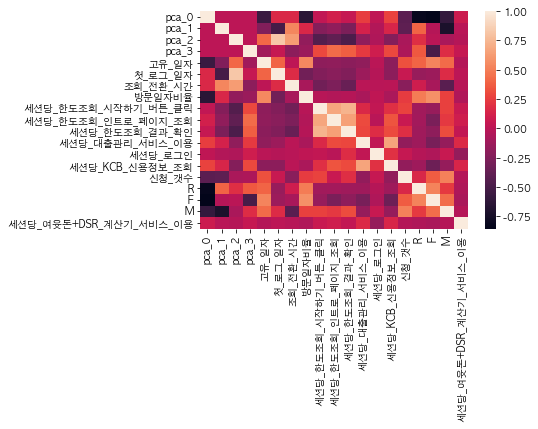

In [77]:
# log

pca = PCA(n_components=4)  # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X_log)
principalDf=pd.DataFrame(printcipalComponents, columns=['pca_0', 'pca_1', 'pca_2', 'pca_3'])
merge_df=pd.concat([principalDf, X_log], axis=1)
corr_df = merge_df.corr()
sns.heatmap(corr_df)

corr_cols = corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j]) > 0.6 and i != j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])


('pca_0', 'funnel_100') 0.83083009238741
('pca_1', 'funnel_10_hesitate_mean') -0.7173383267064464
('pca_3', 'funnel_32_hesitate_sec_mean') 0.6618436799861745
('UG', 'GU') 0.6208697899792271
('GV', 'UGV') 0.7147177048866


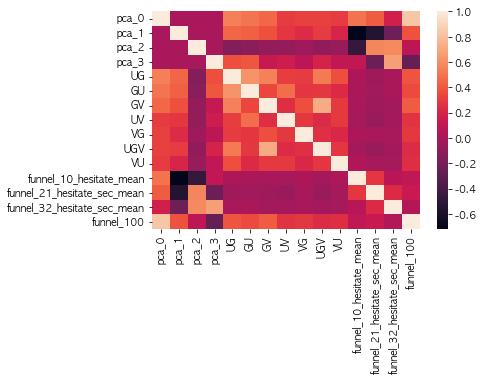

In [21]:
# route

pca = PCA(n_components=4)  # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X_route)
principalDf=pd.DataFrame(printcipalComponents, columns=['pca_0', 'pca_1', 'pca_2', 'pca_3'])
merge_df=pd.concat([principalDf, X_route], axis=1)
corr_df = merge_df.corr()
sns.heatmap(corr_df)

corr_cols = corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j]) > 0.6 and i != j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])


('pca_0', '주거소유형태_1') -0.9785900017706373
('pca_0', '주거소유형태_0') 0.7659717541345179
('pca_1', '주거소유형태_2') 0.7169596592020117
('pca_3', '대출_목적_2') -0.6510048338303477
('pca_3', '유저_성별') -0.6545636176252047
('pca_4', '근로형태_0') 0.6509280068851411
('pca_5', '근로형태_2') 0.634543761858147
('주거소유형태_0', '주거소유형태_1') -0.6261058968130738


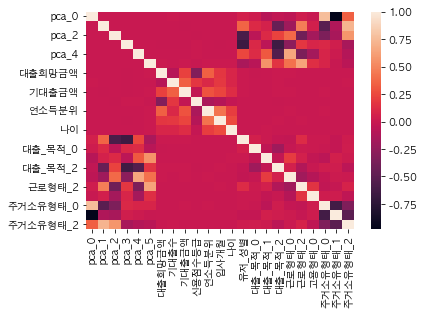

In [22]:
# spec

pca = PCA(n_components=6)  # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X_spec)
principalDf=pd.DataFrame(printcipalComponents, columns=['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5'])
merge_df=pd.concat([principalDf, X_spec], axis=1)
corr_df = merge_df.corr()
sns.heatmap(corr_df)

corr_cols = corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j]) > 0.6 and i != j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])


### 2. 1에서 나온 상관계수를 바탕으로 클러스터에서 PCA 값의 분포에 대한 해석

- cluster000
- cluster111
- cluster202
- cluster212

### log 0, 1, 2

In [41]:
cluster_l0=X_cluster_l[X_cluster_l['cluster_label_l']==0]
cluster_l0


,0,1,2,3,cluster_label_l,유저_번호
0,0.462033,-0.148422,-0.142316,0.193854,0,11.0
1,-0.308327,-0.285956,0.028130,-0.067655,0,12.0
2,0.671961,-0.395065,-0.029257,-0.036056,0,17.0
3,0.179076,0.245156,-0.502467,0.352737,0,24.0
4,0.166128,0.335760,0.175349,0.424588,0,25.0
...,...,...,...,...,...,...
52666,-0.539871,-0.166499,0.137057,0.101927,0,290846.0
52667,0.004954,0.517362,0.445723,0.078430,0,290853.0
52668,0.610595,0.122106,0.193985,-0.000124,0,290862.0
52669,0.188708,0.199424,0.348187,-0.064935,0,290866.0


In [42]:
cluster_l0.groupby(['cluster_label_l']).mean()

,0,1,2,3,유저_번호
cluster_label_l,,,,,
0,-0.00035,0.001264,0.000773,0.000896,145109.500959


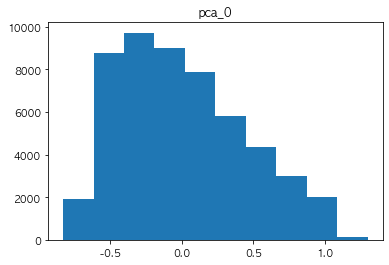

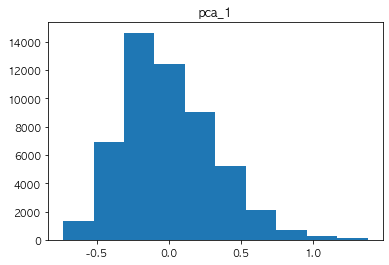

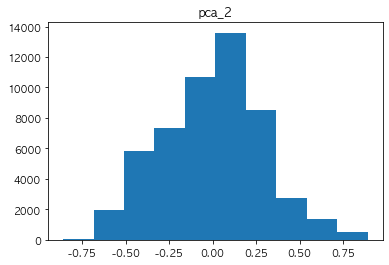

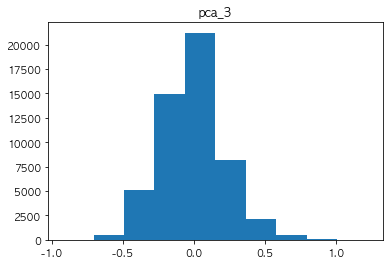

In [43]:
for i in range(4):
    plt.hist(cluster_l0[str(i)])
    plt.title("pca_" + str(i))
    plt.show()

In [44]:
cluster_l1=X_cluster_l[X_cluster_l['cluster_label_l']==1]
cluster_l1

,0,1,2,3,cluster_label_l,유저_번호
106267,-0.637920,-0.086594,-0.048978,0.059891,1,584288.0
106268,0.196370,0.308038,0.351864,-0.092074,1,584295.0
106269,1.047860,-0.151838,-0.010423,0.198690,1,584298.0
106270,0.029099,0.177542,0.044249,0.523229,1,584302.0
106271,-0.322951,-0.289766,0.070636,-0.105386,1,584303.0
...,...,...,...,...,...,...
159958,-0.196124,-0.143046,0.201001,-0.182017,1,879683.0
159959,-0.311809,-0.159689,-0.161496,-0.076844,1,879689.0
159960,0.112068,-0.675404,0.006460,-0.469290,1,879691.0
159961,0.061579,-0.284920,-0.379626,-0.015217,1,879692.0


In [45]:
cluster_l1.groupby(['cluster_label_l']).mean()

,0,1,2,3,유저_번호
cluster_label_l,,,,,
1,0.002182,-0.000484,-0.000299,0.000657,731944.228509


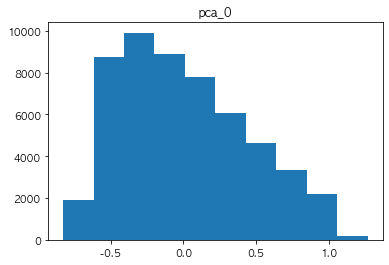

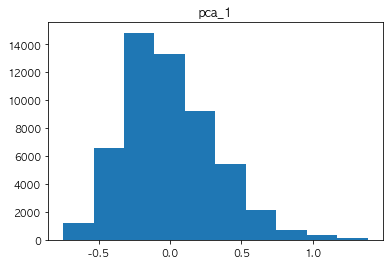

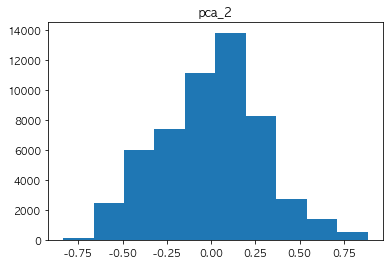

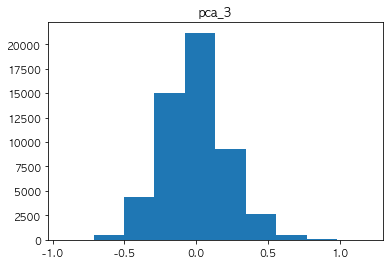

In [46]:
for i in range(4):
    plt.hist(cluster_l1[str(i)])
    plt.title("pca_" + str(i))
    plt.show()

In [47]:
cluster_l2 = X_cluster_l[X_cluster_l['cluster_label_l'] == 2]
cluster_l2

,0,1,2,3,cluster_label_l,유저_번호
52671,-0.121832,-0.311223,0.036031,0.173959,2,290870.0
52672,0.313252,0.460664,-0.429255,0.223018,2,290874.0
52673,0.071695,0.452670,-0.510316,-0.033179,2,290876.0
52674,-0.586327,-0.230725,0.256194,0.063996,2,290887.0
52675,-0.048344,0.343934,0.196109,0.157614,2,290891.0
...,...,...,...,...,...,...
106262,1.031159,-0.106190,-0.173128,0.223525,2,584256.0
106263,-0.041888,0.313961,0.217666,0.166578,2,584265.0
106264,-0.424090,0.022817,-0.558528,-0.126253,2,584278.0
106265,-0.258529,0.435427,0.262721,-0.145266,2,584281.0


In [48]:
cluster_l2.groupby(['cluster_label_l']).mean()

,0,1,2,3,유저_번호
cluster_label_l,,,,,
2,-0.001841,-0.000757,-0.00046,-0.001539,437399.274405


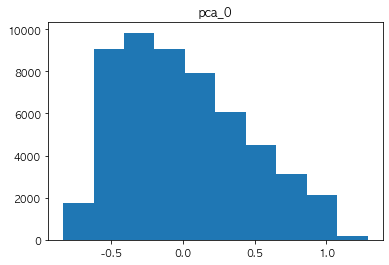

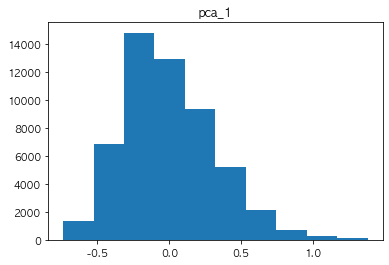

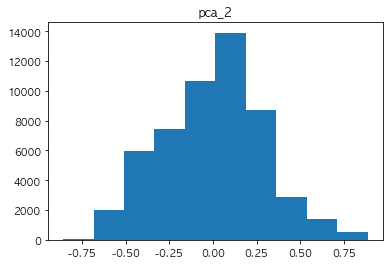

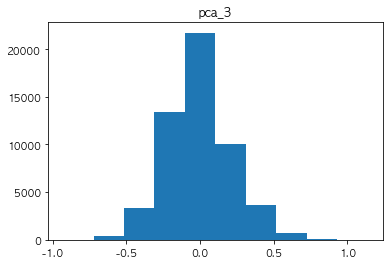

In [49]:
for i in range(4):
    plt.hist(cluster_l2[str(i)])
    plt.title("pca_" + str(i))
    plt.show()


### route 0, 1

In [50]:
cluster_r0 = X_cluster_r[X_cluster_r['cluster_label_r'] == 0]
cluster_r0


,0,1,2,3,cluster_label_r,유저_번호
0,-0.056278,0.074655,0.028864,0.070669,0,11.0
1,0.208724,0.189789,0.096364,-0.250214,0,12.0
2,-0.006804,-0.360561,-0.241682,0.079178,0,17.0
3,-0.293854,-0.200386,0.274652,0.292025,0,24.0
4,-0.136107,0.002056,0.059688,-0.037513,0,25.0
...,...,...,...,...,...,...
80135,0.143060,0.146191,0.066746,-0.140696,0,440615.0
80136,0.363169,-0.088067,0.559787,0.077033,0,440618.0
80137,-0.050001,-0.408806,-0.232149,0.073714,0,440624.0
80138,-0.021766,0.091887,0.025102,-0.106154,0,440627.0


In [51]:
cluster_r0.groupby(['cluster_label_r']).mean()

,0,1,2,3,유저_번호
cluster_label_r,,,,,
0,-0.000393,0.000669,-0.000688,-0.000111,220830.131807


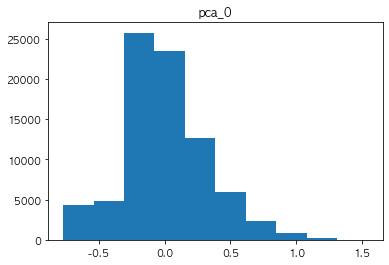

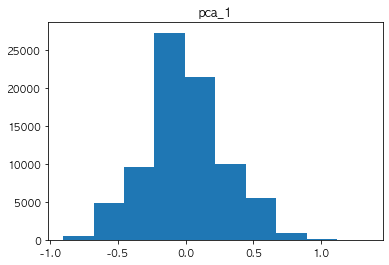

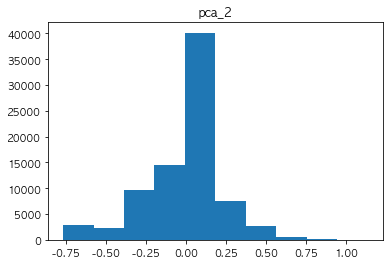

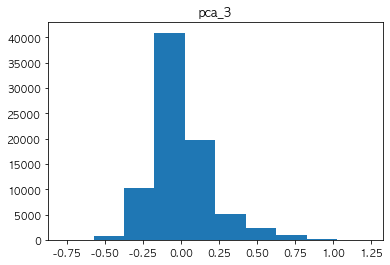

In [52]:
for i in range(4):
    plt.hist(cluster_r0[str(i)])
    plt.title("pca_" + str(i))
    plt.show()

In [53]:
cluster_r1 = X_cluster_r[X_cluster_r['cluster_label_r'] == 1]
cluster_r1


,0,1,2,3,cluster_label_r,유저_번호
80140,-0.128589,0.028896,0.025295,-0.060126,1,440650.0
80141,-0.744357,0.422704,-0.006480,-0.060944,1,440652.0
80142,0.689347,0.603945,-0.085168,-0.044064,1,440655.0
80143,0.182885,0.188453,0.050658,-0.006377,1,440657.0
80144,-0.287915,-0.078105,0.043974,-0.007741,1,440672.0
...,...,...,...,...,...,...
159958,0.296441,0.174119,-0.634655,0.184768,1,879683.0
159959,0.451132,-0.360999,0.264478,0.610950,1,879689.0
159960,-0.071968,-0.022050,0.128459,-0.232695,1,879691.0
159961,0.059162,-0.367243,-0.215790,0.046940,1,879692.0


In [54]:
cluster_r1.groupby(['cluster_label_r']).mean()

,0,1,2,3,유저_번호
cluster_label_r,,,,,
1,0.000394,-0.000672,0.000691,0.000112,660098.775629


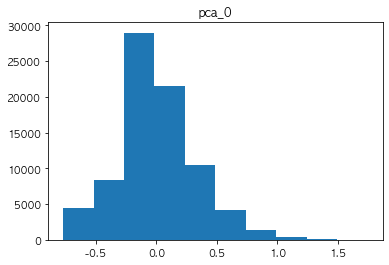

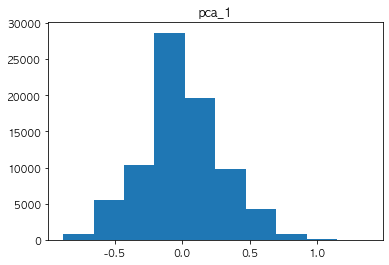

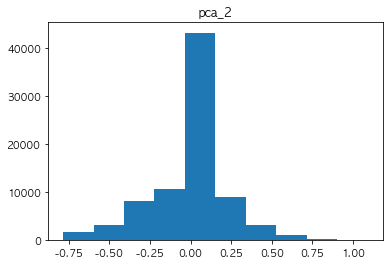

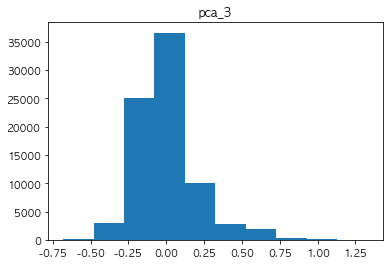

In [55]:
for i in range(4):
    plt.hist(cluster_r1[str(i)])
    plt.title("pca_" + str(i))
    plt.show()


### spec 0, 1, 2

In [56]:
cluster_s0=X_cluster_s[X_cluster_s['cluster_label_s']==0]
cluster_s0

,0,1,2,3,4,5,cluster_label_s,유저_번호
0,0.431451,1.146909,0.064521,0.162141,0.142828,-0.283634,0,11.0
1,-0.671419,-0.656972,0.555877,0.214783,-0.236754,-0.538815,0,12.0
2,-0.612281,0.048461,-0.380228,-0.305332,-0.323157,-0.031076,0,17.0
3,0.742441,-0.293596,-0.549364,-0.244909,-0.254017,0.063600,0,24.0
4,0.721894,-0.672469,-0.192924,-0.399731,0.095746,-0.623207,0,25.0
...,...,...,...,...,...,...,...,...
52722,0.385053,1.188208,0.138901,0.112521,0.391111,0.216978,0,291171.0
52723,0.712558,-0.602017,0.179415,0.925464,0.412804,-0.625499,0,291173.0
52724,-0.622302,0.119042,-0.007725,1.018224,-0.005817,-0.032874,0,291174.0
52725,0.382370,0.370033,0.628196,-0.643033,-0.088269,-0.787183,0,291181.0


In [78]:
cluster_s0.groupby(['cluster_label_s']).mean()

,0,1,2,3,4,5,유저_번호
cluster_label_s,,,,,,,
0,-0.004133,-0.002322,0.000978,-0.003192,-0.000488,-0.001454,145264.482277


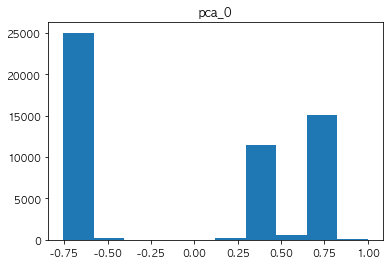

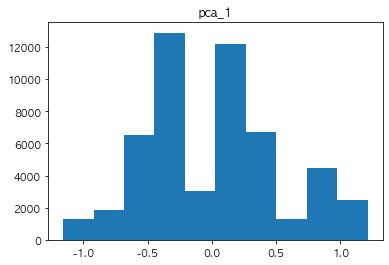

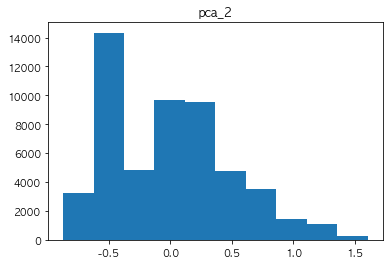

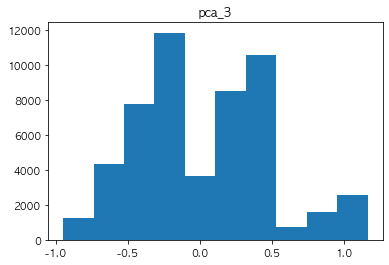

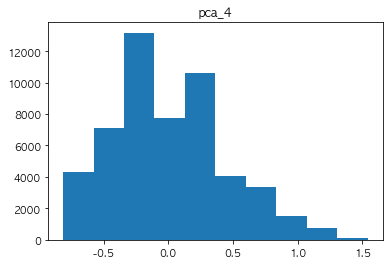

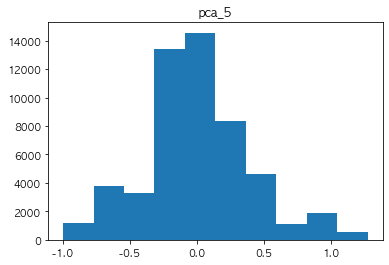

In [58]:
for i in range(6):
    plt.hist(cluster_s0[str(i)])
    plt.title("pca_" + str(i))
    plt.show()


In [59]:
cluster_s1 = X_cluster_s[X_cluster_s['cluster_label_s'] == 1]
cluster_s1

,0,1,2,3,4,5,cluster_label_s,유저_번호
106328,-0.688814,-0.433560,0.520182,0.116010,0.030729,0.583989,1,584627.0
106329,-0.651509,-0.278751,0.199195,0.366829,-0.585895,0.149791,1,584634.0
106330,0.725368,0.145779,-0.682273,0.357812,0.574908,0.380742,1,584635.0
106331,0.742077,-0.294359,-0.548831,-0.246671,-0.254133,0.066517,1,584638.0
106332,-0.695952,-0.064138,0.015590,-0.603519,0.541426,0.901633,1,584643.0
...,...,...,...,...,...,...,...,...
159958,0.714077,-0.429993,-0.079033,0.000084,1.292149,-0.370634,1,879683.0
159959,-0.671871,-0.657481,0.556271,0.212729,-0.237023,-0.536891,1,879689.0
159960,0.738459,-0.270658,-0.648701,-0.192413,-0.365316,0.158078,1,879691.0
159961,-0.662600,0.112900,-0.404540,-0.301361,-0.186558,0.564489,1,879692.0


In [60]:
cluster_s1.groupby(['cluster_label_s']).mean()

,0,1,2,3,4,5,유저_번호
cluster_label_s,,,,,,,
1,0.004518,0.001889,-0.000704,0.002677,0.00171,0.001208,732111.969199


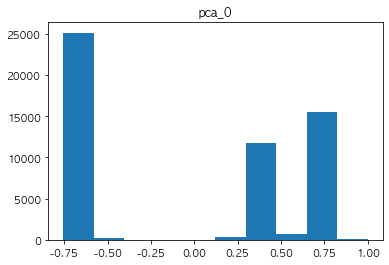

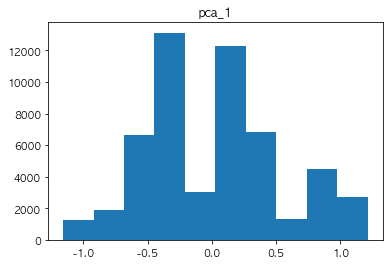

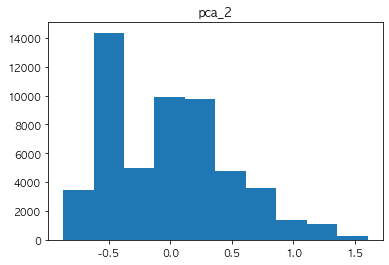

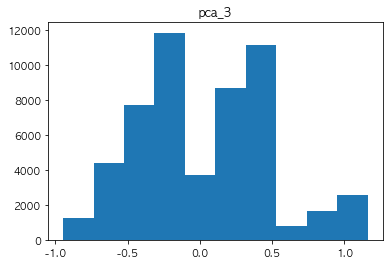

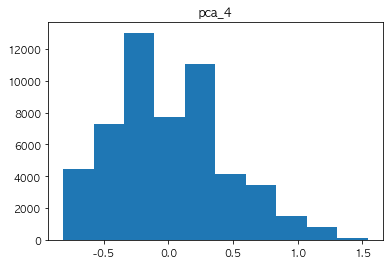

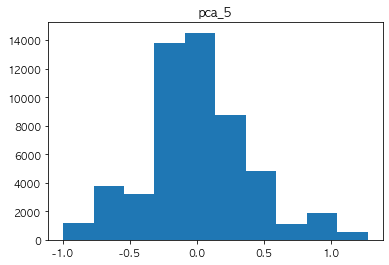

In [61]:
for i in range(6):
    plt.hist(cluster_s1[str(i)])
    plt.title("pca_" + str(i))
    plt.show()


In [62]:
cluster_s2=X_cluster_s[X_cluster_s['cluster_label_s']==2]
cluster_s2



,0,1,2,3,4,5,cluster_label_s,유저_번호
52727,-0.692062,-0.410534,0.420762,0.169960,-0.081132,0.677839,2,291208.0
52728,-0.649227,-0.106370,-0.059249,-0.555958,0.293264,0.403504,2,291216.0
52729,0.401857,0.748014,0.272828,-0.491471,-0.438185,-0.096428,2,291221.0
52730,0.328060,0.654193,0.815951,-0.291968,1.357257,-0.035523,2,291230.0
52731,-0.632856,-0.329276,-0.022482,-0.457667,0.025204,-0.720128,2,291232.0
...,...,...,...,...,...,...,...,...
106323,0.402288,0.749231,0.271412,-0.489039,-0.437269,-0.101157,2,584580.0
106324,-0.651588,-0.278320,0.199953,0.368053,-0.586371,0.149515,2,584588.0
106325,-0.688980,-0.219111,0.422742,0.814428,0.592677,-0.217911,2,584593.0
106326,0.705022,-0.448190,-0.228629,-0.495701,0.362854,0.496771,2,584609.0


In [63]:
cluster_s2.groupby(['cluster_label_s']).mean()



,0,1,2,3,4,5,유저_번호
cluster_label_s,,,,,,,
2,-0.000456,0.000395,-0.000258,0.000461,-0.001231,0.000222,437719.548236


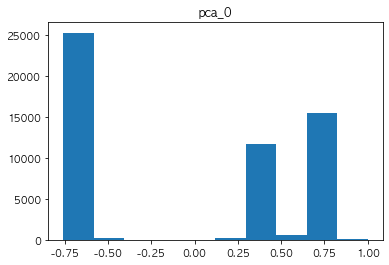

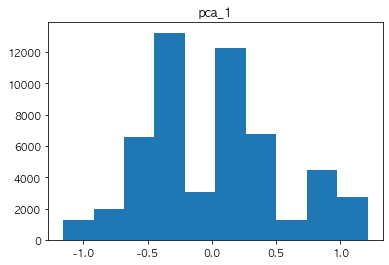

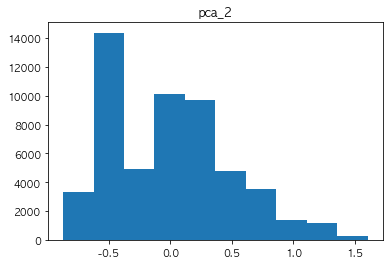

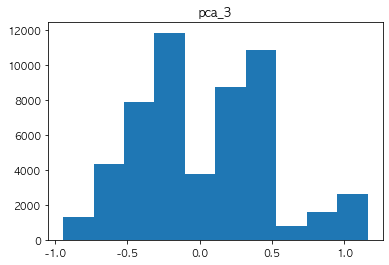

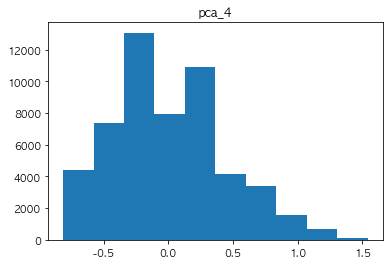

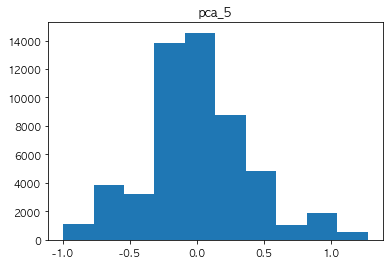

In [64]:
for i in range(6):
    plt.hist(cluster_s2[str(i)])
    plt.title("pca_" + str(i))
    plt.show()
